In [4]:
library(ggplot2)
library(data.table)
library(RColorBrewer)
library(TxDb.Hsapiens.UCSC.hg19.knownGene)
library(ChIPseeker)
library(qqman)


Attache Paket: ‘data.table’


Das folgende Objekt ist maskiert ‘package:GenomicRanges’:

    shift


Das folgende Objekt ist maskiert ‘package:IRanges’:

    shift


Die folgenden Objekte sind maskiert von ‘package:S4Vectors’:

    first, second


Die folgenden Objekte sind maskiert von ‘package:gdata’:

    first, last




In [49]:
#GR-meQTLs
meqtls = fread("../Tables/S2_GRmeQTLs.txt", data.table = F)
dim(meqtls)
head(meqtls)
#baseline-meQTLs
base.meqtls=fread("../Tables/S3_BaselinemeQTLs.txt", data.table = F)
dim(base.meqtls)
head(base.meqtls)

[1] 104828     12

,CpG,SNP,Beta,T.stat,P.value,FDR,Chr,SNP_pos,CpG_start,CpG_end,Relation_to_Island,id
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,cg00011943,rs35015656,-0.05264009,-6.668499,2.893043e-10,1.907761e-05,20,24667628,24686278,24686328,OpenSea,rs35015656cg00011943
2,cg00011943,rs36102356,-0.05565357,-7.102814,2.552164e-11,2.934013e-06,20,24672642,24686278,24686328,OpenSea,rs36102356cg00011943
3,cg00011943,rs6049863,-0.05298120,-6.702282,2.402561e-10,1.684098e-05,20,24657264,24686278,24686328,OpenSea,rs6049863cg00011943
4,cg00011943,rs742809,-0.05298120,-6.702282,2.402561e-10,1.684098e-05,20,24657767,24686278,24686328,OpenSea,rs742809cg00011943
5,cg00011943,rs36062686,-0.03711112,-4.999677,1.327046e-06,3.014397e-02,20,24713313,24686278,24686328,OpenSea,rs36062686cg00011943
6,cg00011943,rs6049921,-0.04395441,-5.625737,6.740837e-08,2.444155e-03,20,24711015,24686278,24686328,OpenSea,rs6049921cg00011943


[1] 7022984      10

,SNP,CpG,Beta,T-stat,P-value,FDR,Chr,CpG_pos,Relation_to_Island,SNP_pos
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>
1,1-100175913,cg05009352,0.07958731,6.769962,1.653275e-10,2.477908e-07,chr1,100151394,OpenSea,100175913
2,1-100252872,cg18162957,0.04649923,4.291064,2.863303e-05,1.381469e-02,chr1,100286306,OpenSea,100252872
3,1-100282549,cg18162957,0.02731080,8.521929,5.423195e-15,1.499127e-11,chr1,100286306,OpenSea,100282549
4,1-100282549,cg03360767,-0.02466728,-4.749852,4.071203e-06,2.544286e-03,chr1,100193478,OpenSea,100282549
5,1-100282549,cg13550411,0.02194240,4.256960,3.291042e-05,1.551223e-02,chr1,100317498,S_Shore,100282549
6,1-100396430,cg03360767,-0.02724062,-4.974965,1.485323e-06,1.039933e-03,chr1,100193478,OpenSea,100396430


## Panel A - Manhatten Plot

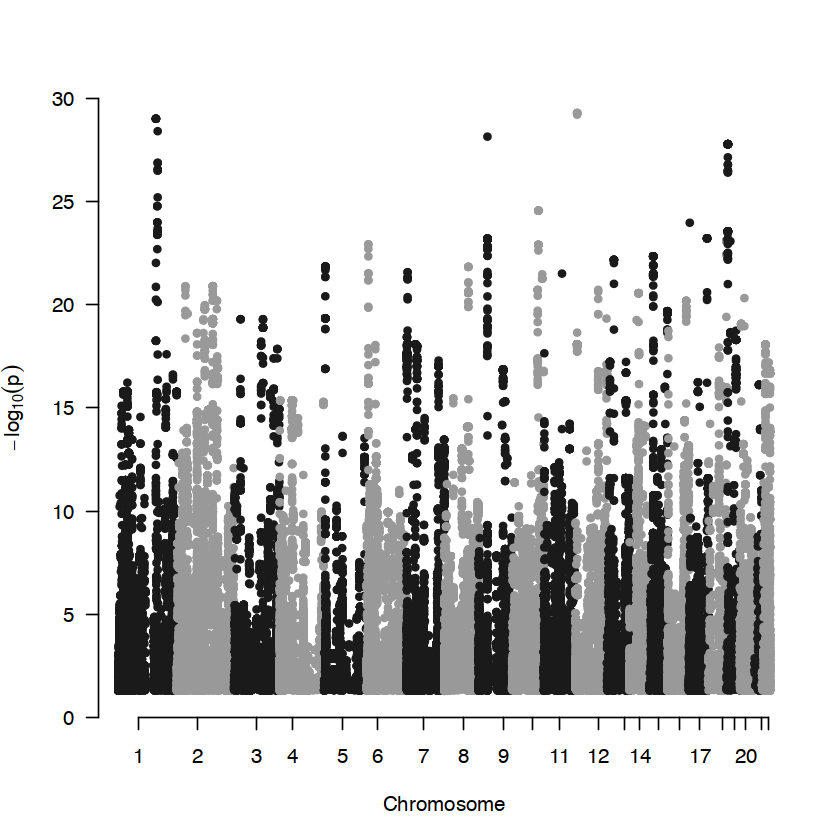

In [9]:
manhattan(meqtls, chr = "Chr", bp = "SNP_pos", p = "FDR", snp = "SNP",
          col = c("gray10", "gray60"), chrlabs = NULL,
          suggestiveline = NULL, highlight = NULL, logp = TRUE, genomewideline = NULL)

## Panel B-C - Boxplots

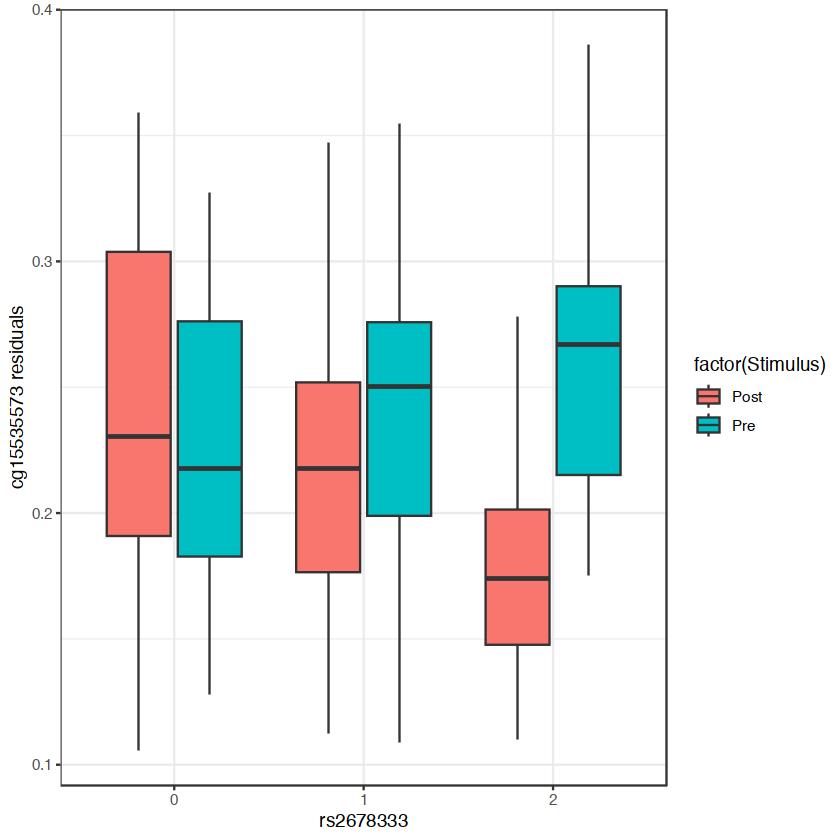

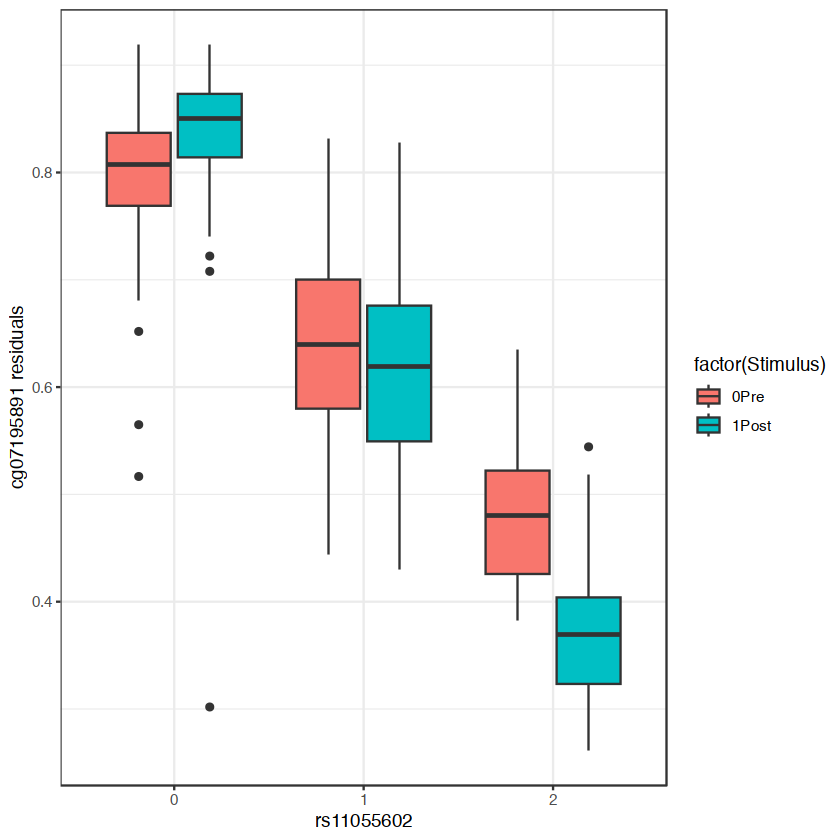

In [14]:
meqtl1 = readRDS("data/rs2678333_cg15535573.rds")
ggplot(meqtl1, aes(x=rs2678333 , y=cg15535573, fill=factor(Stimulus))) + geom_boxplot()+theme_bw() +
        ylab("cg15535573 residuals")
meqtl2 = readRDS("data/rs11055602_cg07195891.rds")
ggplot(meqtl2, aes(x=rs11055602 , y=cg07195891, fill=factor(Stimulus))) + geom_boxplot()+theme_bw() +
        ylab("cg07195891 residuals")

## Panel D - Bar plot (island)

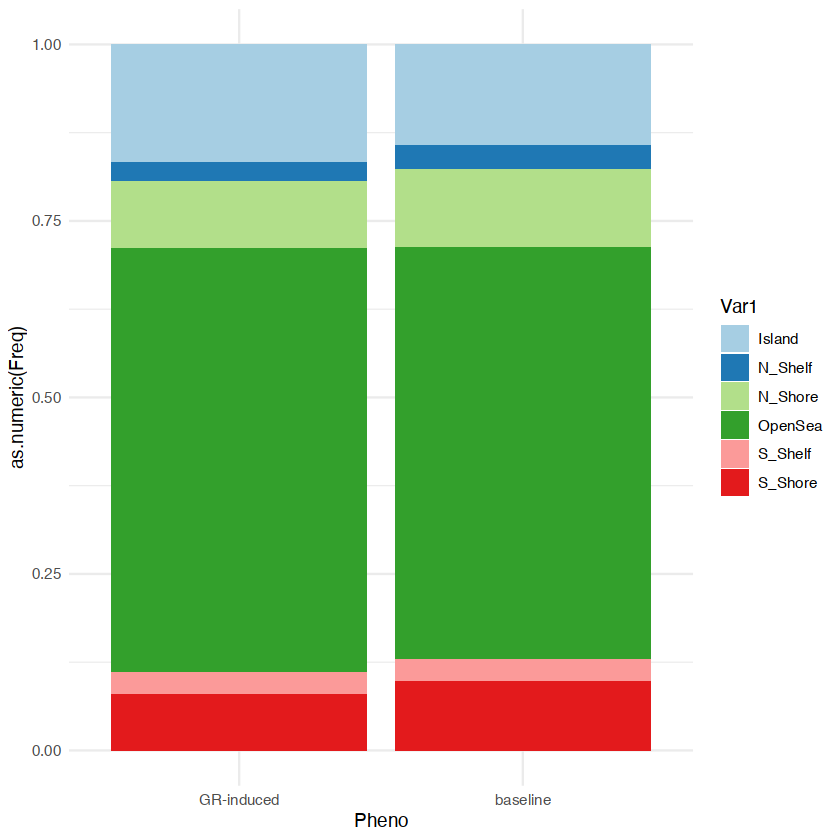

In [50]:
island=as.data.frame(table(meqtls[ !duplicated(meqtls$CpG),]$Relation_to_Island))
island$Freq =  (island$Freq *100)/ sum(island$Freq)
island$Pheno="GR-induced"

island.base=as.data.frame(table(base.meqtls[ !duplicated(base.meqtls$CpG),]$Relation_to_Island))
island.base$Freq =  (island.base$Freq *100)/ sum(island.base$Freq)
island.base$Pheno="baseline"

island.all = rbind(island.base, island)

ggplot(data=island.all , aes(x=Pheno, y=as.numeric(Freq), fill=Var1)) + 
  geom_bar(position = "fill", stat = "identity") + 
  scale_fill_brewer(name='Var1', palette = 'Paired') +
  theme_minimal() 

## Panel E-F - Bar plot (location)

>> preparing features information...		 2024-01-22 11:42:41 
>> identifying nearest features...		 2024-01-22 11:42:41 
>> calculating distance from peak to TSS...	 2024-01-22 11:42:43 
>> assigning genomic annotation...		 2024-01-22 11:42:43 
>> adding gene annotation...			 2024-01-22 11:42:51 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2024-01-22 11:42:51 
>> done...					 2024-01-22 11:42:51 
>> preparing features information...		 2024-01-22 11:42:53 
>> identifying nearest features...		 2024-01-22 11:42:53 
>> calculating distance from peak to TSS...	 2024-01-22 11:43:02 
>> assigning genomic annotation...		 2024-01-22 11:43:02 
>> adding gene annotation...			 2024-01-22 11:43:08 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2024-01-22 11:43:08 
>> done...					 2024-01-22 11:43:08 


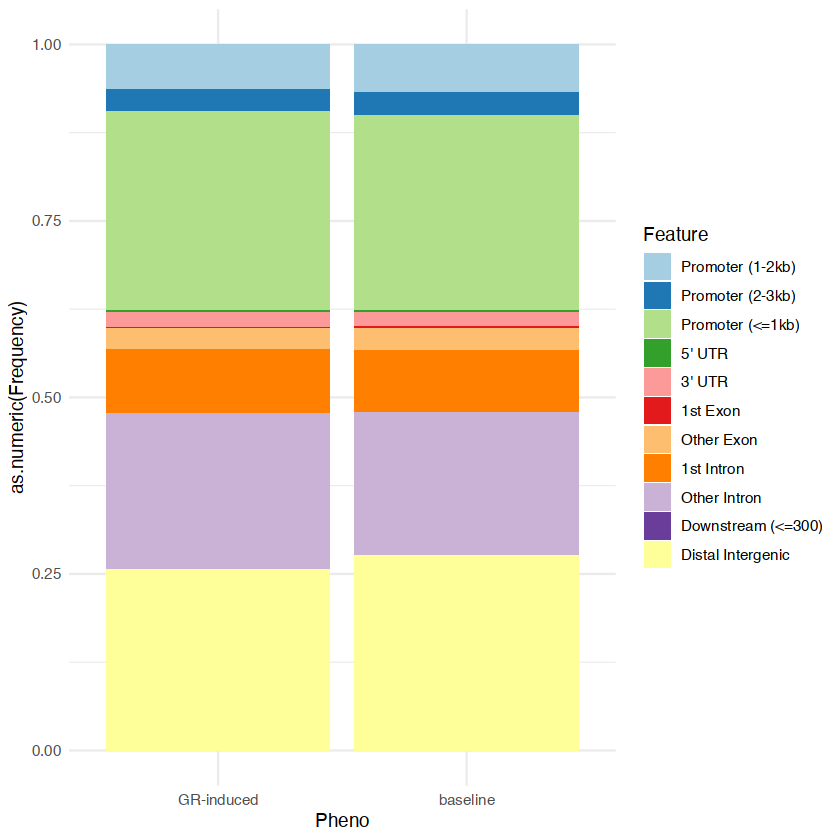

In [51]:
#1 meCpGs
meqtl.range <- GenomicRanges::GRanges(seqnames = paste0("chr",  meqtls$Chr),
                                    ranges = IRanges::IRanges(start = meqtls$CpG_start,
                                                              end = meqtls$CpG_end))
names(meqtl.range) <- meqtls$CpG
meqtl.range <- meqtl.range[ !duplicated(meqtl.range)]
meqtl.range.anno <- annotatePeak(unique(meqtl.range), 
                               TxDb = TxDb.Hsapiens.UCSC.hg19.knownGene, 
                               annoDb = "org.Hs.eg.db")
meqtl.range.anno= meqtl.range.anno@annoStat
meqtl.range.anno$Pheno="GR-induced"
                                      
base.meqtl.range <- GenomicRanges::GRanges(seqnames = base.meqtls$Chr,
                                      ranges = IRanges::IRanges(start = base.meqtls$CpG_pos,
                                                                end = base.meqtls$CpG_pos+50))
names(base.meqtl.range) <- base.meqtls$CpG
base.meqtl.range=base.meqtl.range[!duplicated(base.meqtl.range)]
base.meqtl.range.anno <- annotatePeak(unique(base.meqtl.range), 
                                 TxDb = TxDb.Hsapiens.UCSC.hg19.knownGene, 
                                 annoDb = "org.Hs.eg.db")
base.meqtl.range.anno = base.meqtl.range.anno @annoStat
base.meqtl.range.anno$Pheno="baseline"

all = rbind(base.meqtl.range.anno , meqtl.range.anno )

ggplot(data=all , aes(x=Pheno, y=as.numeric(Frequency), fill=Feature)) + 
  geom_bar(position = "fill", stat = "identity") +
  scale_fill_brewer(name='Feature', palette = 'Paired') +
  theme_minimal() 

>> preparing features information...		 2024-01-22 11:43:13 
>> identifying nearest features...		 2024-01-22 11:43:13 
>> calculating distance from peak to TSS...	 2024-01-22 11:43:14 
>> assigning genomic annotation...		 2024-01-22 11:43:14 
>> adding gene annotation...			 2024-01-22 11:43:31 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2024-01-22 11:43:31 
>> done...					 2024-01-22 11:43:31 
>> preparing features information...		 2024-01-22 11:43:35 
>> identifying nearest features...		 2024-01-22 11:43:35 
>> calculating distance from peak to TSS...	 2024-01-22 11:44:35 
>> assigning genomic annotation...		 2024-01-22 11:44:35 
>> adding gene annotation...			 2024-01-22 11:45:07 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2024-01-22 11:45:19 
>> done...					 2024-01-22 11:45:19 


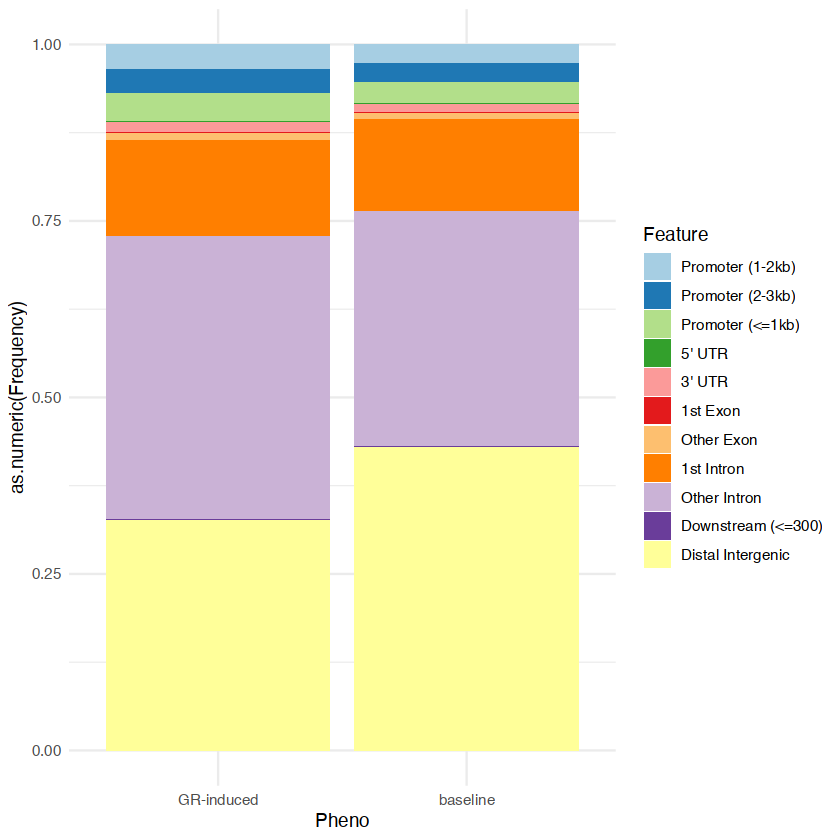

In [52]:
#2 meSNPs
meqtl.range <- GenomicRanges::GRanges(seqnames = paste0("chr",  meqtls$Chr),
                                    ranges = IRanges::IRanges(start = meqtls$SNP_pos,
                                                              end = meqtls$SNP_pos+1))
names(meqtl.range) <- meqtls$SNP
meqtl.range <- meqtl.range[ !duplicated(meqtl.range)]
meqtl.range.anno <- annotatePeak(unique(meqtl.range), 
                               TxDb = TxDb.Hsapiens.UCSC.hg19.knownGene, 
                               annoDb = "org.Hs.eg.db")
meqtl.range.anno= meqtl.range.anno@annoStat
meqtl.range.anno$Pheno="GR-induced"
                                      
base.meqtl.range <- GenomicRanges::GRanges(seqnames = base.meqtls$Chr,
                                      ranges = IRanges::IRanges(start = base.meqtls$SNP_pos,
                                                                end = base.meqtls$SNP_pos+1))
names(base.meqtl.range) <- base.meqtls$SNP
base.meqtl.range=base.meqtl.range[!duplicated(base.meqtl.range)]
base.meqtl.range.anno <- annotatePeak(unique(base.meqtl.range), 
                                 TxDb = TxDb.Hsapiens.UCSC.hg19.knownGene, 
                                 annoDb = "org.Hs.eg.db")
base.meqtl.range.anno = base.meqtl.range.anno @annoStat
base.meqtl.range.anno$Pheno="baseline"

all = rbind(base.meqtl.range.anno , meqtl.range.anno )

ggplot(data=all , aes(x=Pheno, y=as.numeric(Frequency), fill=Feature)) + 
  geom_bar(position = "fill", stat = "identity") +
  scale_fill_brewer(name='Feature', palette = 'Paired') +
  theme_minimal() 

## Panel G-H - Bar plot (GRE)

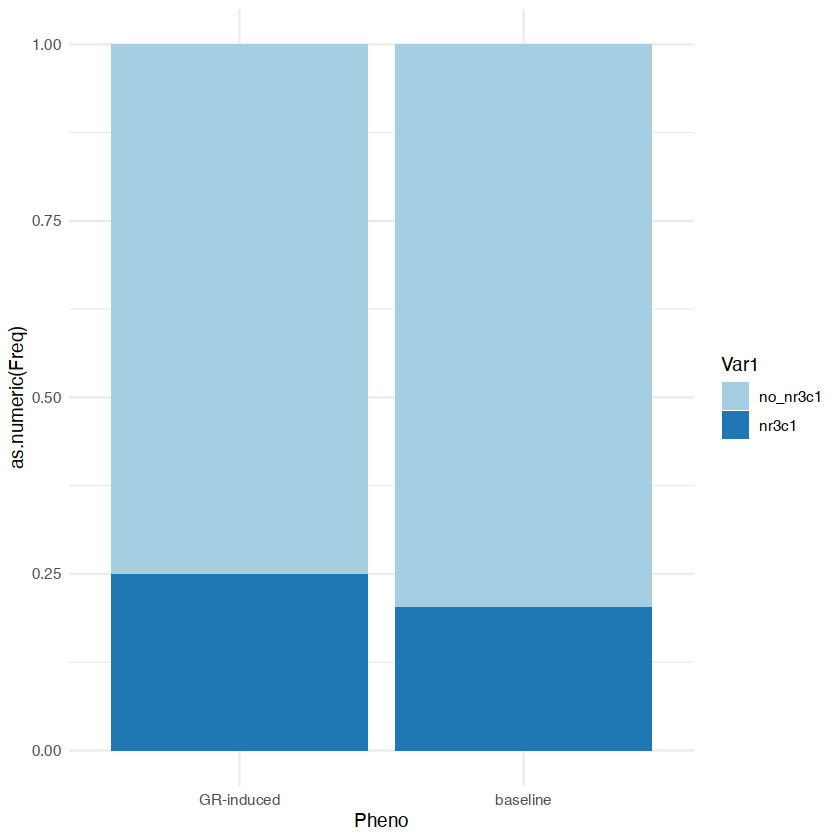

In [42]:
#1 meCpGs
meqtls.gre = read.delim("data/meQTLs_cpg_gre_annotated.txt")[17]
gre=cbind("nr3c1", length(unique(meqtls.gre$CpG_ID)))
no=cbind("no_nr3c1", length(unique(meqtls$CpG))-length(unique(meqtls.gre$CpG_ID)))
gre=as.data.frame(rbind(gre,no ))
colnames(gre)=c("Var1", "Freq")
gre$Freq=(as.numeric(gre$Freq) *100)/ sum(as.numeric(gre$Freq))

base.meqtls.gre = read.delim("data/base_meQTLs_cpg_gre_annotated.txt")[17]
gre.b=cbind("nr3c1", length(unique(base.meqtls.gre$CpG_ID)))
no.b=cbind("no_nr3c1", length(unique(base.meqtls$CpG))-length(unique(base.meqtls.gre$CpG_ID)))
gre.b=as.data.frame(rbind(gre.b,no.b ))
colnames(gre.b)=c("Var1", "Freq")
gre.b$Freq=(as.numeric(gre.b$Freq) *100)/ sum(as.numeric(gre.b$Freq))
gre.b$Pheno="baseline"
gre$Pheno="GR-induced"
gre_all = rbind(gre.b, gre)

ggplot(data=gre_all,aes(x=Pheno, y=as.numeric(Freq), fill=Var1)) + 
  geom_bar(position = "fill", stat = "identity") +
  scale_fill_brewer(name='Var1', palette = 'Paired') +
  theme_minimal() 

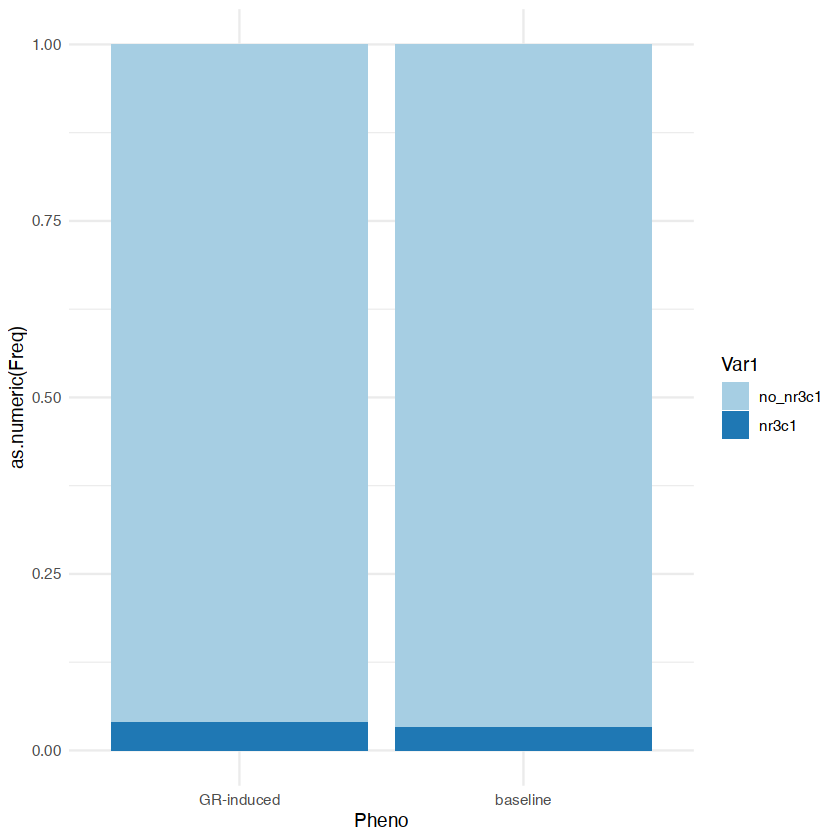

In [48]:
# 2 eSNPs
meqtls.gre = read.delim("data/meQTLs_snp_gre_annotated.txt")[17]
gre=cbind("nr3c1", length(unique(meqtls.gre$SNP)))
no=cbind("no_nr3c1", length(unique(meqtls$SNP))-length(unique(meqtls.gre$SNP)))
gre=as.data.frame(rbind(gre,no ))
colnames(gre)=c("Var1", "Freq")
gre$Freq=(as.numeric(gre$Freq) *100)/ sum(as.numeric(gre$Freq))

base.meqtls.gre = read.delim("data/base_meQTLs_snp_gre_annotated.txt")[17]
gre.b=cbind("nr3c1", length(unique(base.meqtls.gre$SNP)))
no.b=cbind("no_nr3c1", length(unique(base.meqtls$SNP))-length(unique(base.meqtls.gre$SNP)))
gre.b=as.data.frame(rbind(gre.b,no.b ))
colnames(gre.b)=c("Var1", "Freq")
gre.b$Freq=(as.numeric(gre.b$Freq) *100)/ sum(as.numeric(gre.b$Freq))
gre.b$Pheno="baseline"
gre$Pheno="GR-induced"
gre_all = rbind(gre.b, gre)

ggplot(data=gre_all,aes(x=Pheno, y=as.numeric(Freq), fill=Var1)) + 
  geom_bar(position = "fill", stat = "identity") +
  scale_fill_brewer(name='Var1', palette = 'Paired') +
  theme_minimal() 

In [1]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_1.0.4     crayon_1.5.2    digest_0.6.33   utf8_1.2.3     
 [5] IRdisplay_1.1   repr_1.1.6      lifecycle_1.0.3 jsonlite_1.8.7 
 [9] evaluate_0.21   pillar_1.9.0    rlang_1.1.1     cli_3.6.1      
[13] uuid_1.1-0      vctrs_0.6.3     IRkernel_1.3.2  tools_4.2.1    
[17] glue_1.6.2      fastmap_1.1.1   compiler_4.2.1  base64enc_0.1-3
[21] pbdZMQ_0.3-11   htmltools_0.5.5